# Analysis on Historic Spot and Simulation Results
This notebook presents statistical analysis on the historic results from the simulated spot prices on the VIC area in AEMO. 
### input
The input file is taken from the csv folder. Analysis can also be done with the file OpenNemDataVictoria2004-2019_VS_SimulationResultsX.csv that merges simulation and historic generated electricity from the openNem data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.dates import DateFormatter
import seaborn as sns

#import earthpy as et

# Date time conversion registration
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import register_matplotlib_converters

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")
spot_simul_file = "SimDataMonthlySummary2019-10-22-01_13_18.csv"
spot_simul_data = pd.read_csv(spot_simul_file,
                               parse_dates = ['Time (Month)'],
                               index_col = ['Time (Month)'])
spot_simul_data.head(10)

# All data. Load simualted and historic data

sns.set(font_scale=1.5, style="whitegrid")
historicAndSimulResults = "OpenNemDataVictoria2004-2019_VS_SimulationResults2.csv "
historicAndSimulResults = pd.read_csv(historicAndSimulResults,
                               parse_dates = ['date'],
                               index_col = ['date'])
historicAndSimulResults.tail()

FileNotFoundError: [Errno 2] File b'SimDataMonthlySummary2019-10-22-01_13_18.csv' does not exist: b'SimDataMonthlySummary2019-10-22-01_13_18.csv'

In [ ]:
#spot_simul_data.dtypes
historicAndSimulResults.dtypes

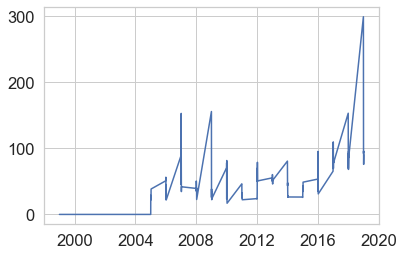

In [20]:
#spot_simul_data.index
volumeWeightedHistoric = historicAndSimulResults["Volume Weighted Price (Historic) - $/MWh"]
plt.plot(historicAndSimulResults.index, volumeWeightedHistoric)


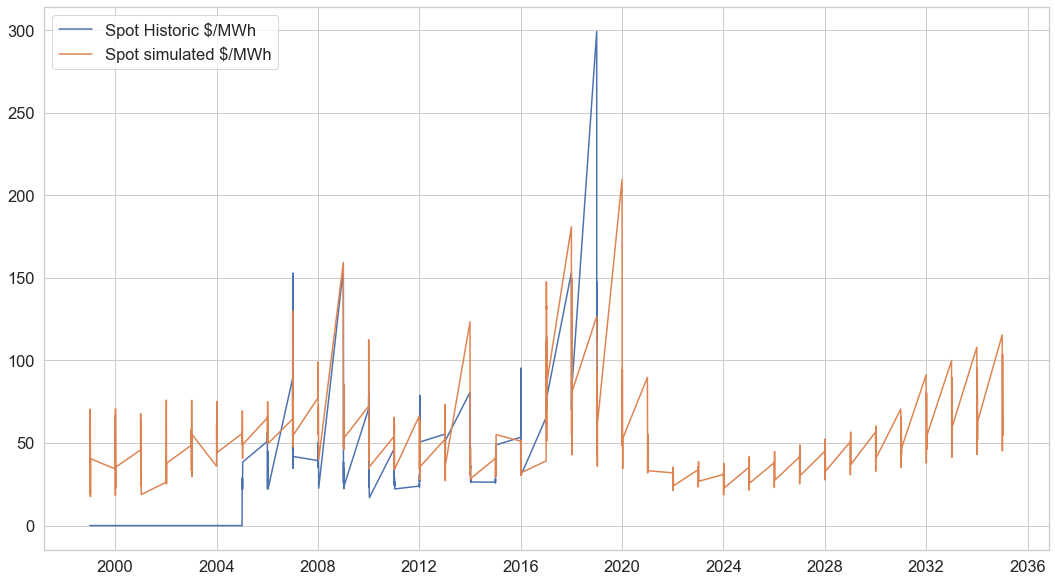

In [21]:
# Plot of total spot prices per month

# fig, ax = plt.subplots(figsize = (10,8))
# ax.plot(spot_simul_data.index,
#        spot_simul_data[" Avg Tariff (c/KWh) per household"],
#        COLOR = 'purple')

#ax.set(xlabel = 'DATE', ylabel = '$/MWh',
#     title = "Monthly Historic Spot prices Simulated ($/MWh) - NEM\n 1999-2018")
#plt.show()

# Plot of total spot prices per month

plt.figure(figsize=[18,10])
plt.grid(True)
plt.plot(volumeWeightedHistoric, label='Spot Historic $/MWh')
plt.plot(historicAndSimulResults["Spot simulated with forecast"],
         label='Spot simulated $/MWh')
plt.legend(loc=2)
#plt.set(xlabel = 'DATE', ylabel = '$/MWh',title = "Monthly Historic Spot prices and Simulated Spot ($/MWh) - NEM\n 1999-2036")
plt.show()


In [55]:
# Resampling to quarterly moving average every 
spot_simul_data['SMA_3'] = spot_simul_data.iloc[:,1].rolling(window=12).mean()
spot_simul_data['SMA_4'] = spot_simul_data.iloc[:,1].rolling(window=4).mean()

spot_simul_data.tail()

,Consumption (MWh) per household,Avg Tariff (c/KWh) per household,GHG Emissions (tCO2-e) per household,Number of Domestic Consumers (households),SMA_3,SMA_4
Time (Month),,,,,,
2018-08-01,0.527508,104.595261,0.681474,2593467.0,115.922925,124.143967
2018-09-01,0.467360,68.433411,0.621345,2596603.0,113.510475,115.817493
2018-10-01,0.454099,44.979916,0.601797,2599739.0,111.554102,86.443629
2018-11-01,0.432514,45.106598,0.572312,2602875.0,102.348065,65.778796
2018-12-01,0.462829,87.076920,0.610838,2606011.0,100.657677,61.399211


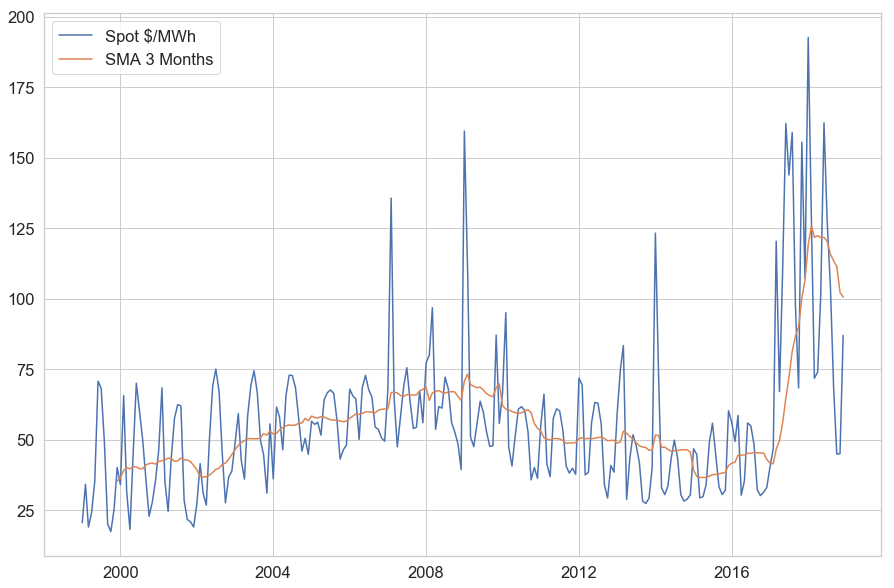

In [56]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(spot_simul_data[' Avg Tariff (c/KWh) per household'],label='Spot $/MWh')
plt.plot(spot_simul_data['SMA_3'],label='SMA 3 Months')
plt.legend(loc=2)

In [57]:
# cumulative moving average
spot_simul_data2 = pd.DataFrame(spot_simul_data.iloc[:,1])
spot_simul_data2.head()
spot_simul_data2['CMA_3'] = spot_simul_data2.expanding(min_periods=3).mean()

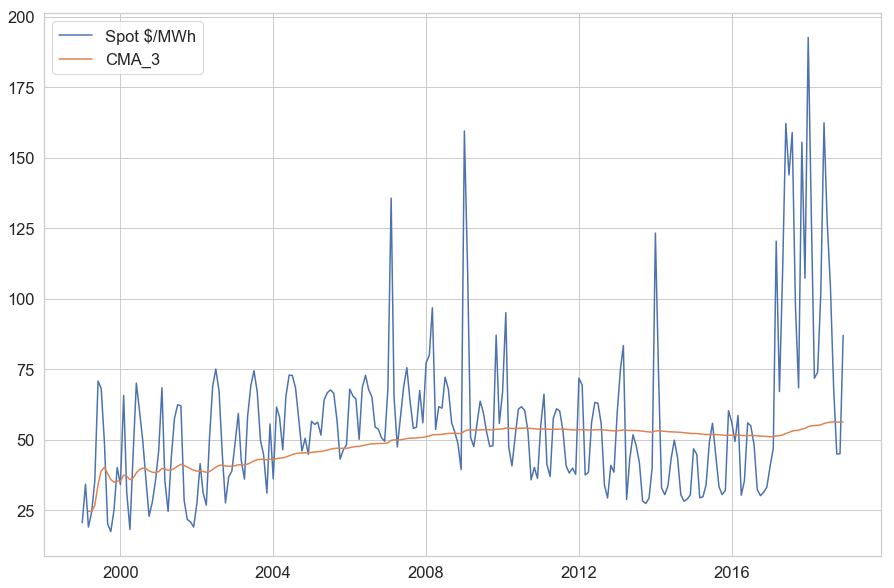

In [58]:
#Plot cumulative moving average

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(spot_simul_data[' Avg Tariff (c/KWh) per household'],label='Spot $/MWh')
plt.plot(spot_simul_data2['CMA_3'],label='CMA_3')
plt.legend(loc=2)


In [83]:
# Calculation and Plot of Bollinger band (2 std)
spot_simul_data['Monthly STD'] = spot_simul_data.iloc[:,1].rolling(window=3).std()
spot_simul_data['Upper Band'] = spot_simul_data['SMA_3'] + (spot_simul_data['Monthly STD'] * 2)
spot_simul_data['Lower Band'] = spot_simul_data['SMA_3'] - (spot_simul_data['Monthly STD'] * 2)

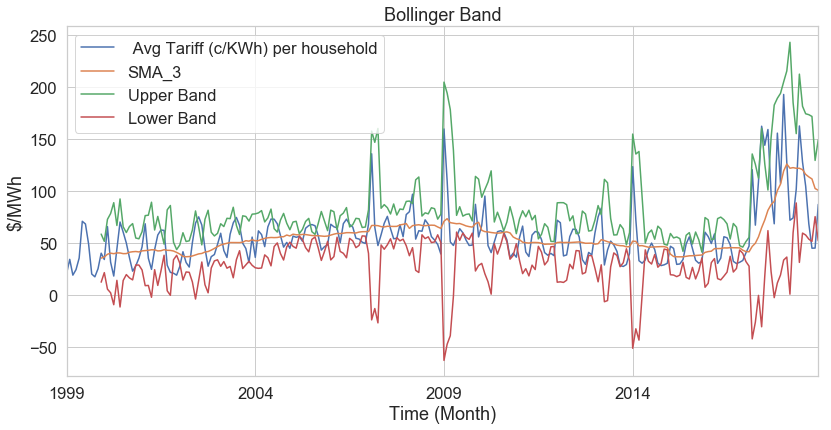

In [84]:
spot_simul_data[[' Avg Tariff (c/KWh) per household', 'SMA_3', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('Bollinger Band')
plt.ylabel('$/MWh')
plt.show();

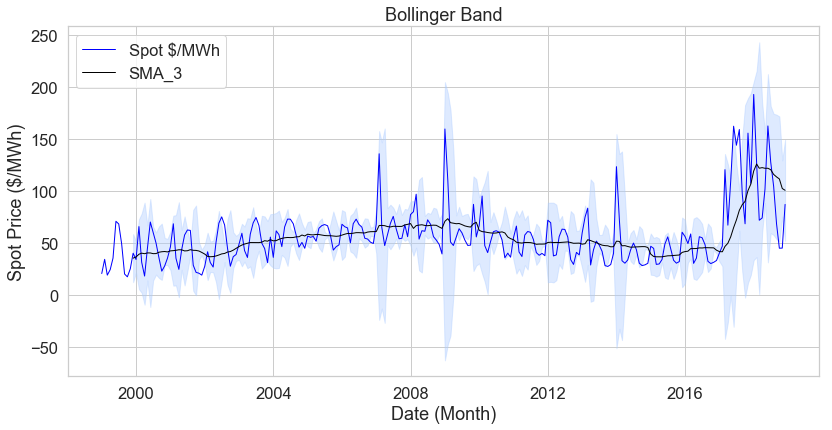

In [85]:
# set style, empty figure and axes
#plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for spot DataFrame
x_axis = spot_simul_data.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, spot_simul_data['Upper Band'], spot_simul_data['Lower Band'], color = '#ADCCFF',alpha='0.4')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, spot_simul_data[' Avg Tariff (c/KWh) per household'], label='Spot $/MWh', color = 'blue', lw = 1)
ax.plot(x_axis, spot_simul_data['SMA_3'], color = 'black', lw = 1)

# Set Title & Show the Image
ax.set_title('Bollinger Band')
ax.set_xlabel('Date (Month)')
ax.set_ylabel('Spot Price ($/MWh)')
ax.legend(loc = 2)
plt.show();

In [ ]:
## add historic generation figures from openNem (2004-2019)



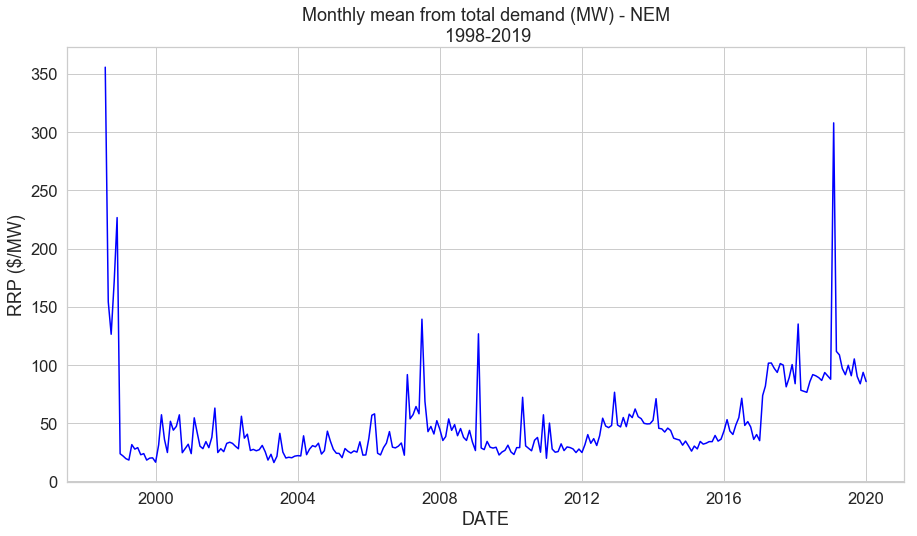

In [16]:
fig, ax = plt.subplots(figsize = (15,8))

ax.plot(total_demand_data_monthly.index,
            total_demand_data_monthly ['PRICE'],
            COLOR = 'BLUE')

ax.set(xlabel = 'DATE', ylabel = 'RRP ($/MW)',
     title="Monthly mean from total demand (MW) - NEM\n 1998-2019")
plt.show()

In [17]:
# Create file with mean monthly demand in MW 
df = pd.DataFrame(total_demand_data_monthly)#, columns = ['TOTALDEMAND (MW)', 'RRP ($/MWh)'])
total_demand_data_monthly_csv_string = df.to_csv()
df=df.dropna(axis = 0, how = 'all')

In [18]:
df.head(10)

,TOTALDEMAND (MW),PRICE,Unnamed: 3,
SETTLEMENTDATE,,,,
1998-07-31,4222.127273,355.765455,NaN,NaN
1998-08-31,4289.272917,154.308125,NaN,NaN
1998-09-30,4381.816667,126.440833,NaN,NaN
1998-10-31,4809.781250,171.650625,NaN,NaN
1998-11-30,5243.037500,226.618958,NaN,NaN
1998-12-31,3837.784896,23.813219,NaN,NaN
1999-01-31,4475.264785,21.817285,NaN,NaN
1999-02-28,4511.208408,19.626905,NaN,NaN
1999-03-31,4445.128091,18.405538,NaN,NaN


In [ ]:
#File with monthly mean demand data 
f = open('price_and_total_demand_monthly.csv', 'w')
f.write(total_demand_data_monthly_csv_string)
f.close()


In [ ]:
# total demand 30 min mean resampled in hours gives the consumption in MWh
consumption_data_hourly = total_demand_data.resample('H').mean()
consumption_data_hourly.head (10)

In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
consumption_data_hourly['TOTALDEMAND (MW)'].plot(linewidth=0.5);

In [ ]:
# Consumption per month (MWh)
consumption_data_month = consumption_data_hourly.resample('M').sum()
consumption_data_month.head (10)

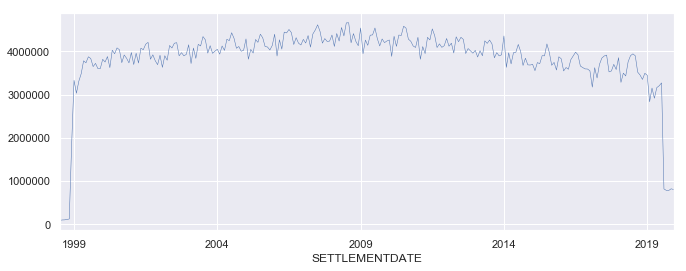

In [52]:
sns.set(rc={'figure.figsize':(11, 4)})
consumption_data_month ['TOTALDEMAND (MW)'].plot(linewidth=0.5);

In [67]:
#Boxpots to check seasonality
#fig, axes = plt.subplots(figsize=(11, 10))
#sns.boxplot(data = consumption_data_month, x= name, y = name)
#ax.set_ylabel('MWh')
#ax.set_title(name)


In [70]:
# Consumption per quarter in (MWh)
#consumption_data_year['Quarter'] = pd.PeriodIndex(consumption_data_year, freq='Q-MAR').strftime('Q%q')
consum_freq = consumption_data_month.asfreq('Q')
#print(consum_freq)
#consumption_data_year = consumption_data_month.resample('Y').sum()
#consumption_data_year.head (10)


In [ ]:
 # Consumption per year in (TWh)
  
consumption_data_year_TWh= consumption_data_year.div([1000000, 1, 1, 1], axis='columns')
consumption_data_year_TWh.head(25)

In [4]:
historic_wholesale_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/2005_2020_OpenNemDataV1.csv', index_col='Time (Month)')
historic_wholesale_df.index = pd.to_datetime(historic_wholesale_df.index)

historic_wholesale_df.head(100)

,Temperature - C,Solar (Rooftop) Market Value - $,Solar (Rooftop) - GWh,Solar (Utility) Market Value - $,Solar (Utility) - GWh,Wind Market Value - $,Wind - GWh,Hydro Market Value - $,Hydro - GWh,Battery (Discharging) Market Value - $,...,Wind Market Value - $/MWh,Hydro Market Value - $/MWh,Battery (Discharging) Market Value - $/MWh,Gas (OCGT) Market Value - $/MWh,Gas (Steam) Market Value - $/MWh,Brown Coal Market Value - $/MWh,Imports Market Value - $/MWh,Exports Market Value - $/MWh,Volume Weighted Price (Historic) - $/MWh,Imports % from wholesale price
Time (Month),,,,,,,,,,,,,,,,,,,,,
2005-04-01,NaN,0.0,0.00,0.0,0.0,0.00,0.00,11848263.30,304.50,0.0,...,0.000000,38.910553,0.0,44.023585,39.220646,30.605720,38.289921,-19.009200,31.809904,20%
2005-05-01,NaN,0.0,0.00,0.0,0.0,0.00,0.00,8161908.91,260.01,0.0,...,0.000000,31.390750,0.0,35.260919,35.709309,24.667570,31.791585,-18.044240,25.330109,26%
2005-06-01,NaN,0.0,0.00,0.0,0.0,0.00,0.00,6597447.23,200.71,0.0,...,0.000000,32.870546,0.0,50.142422,37.533559,23.616642,30.781600,-17.572286,24.249596,27%
2005-07-01,NaN,0.0,0.00,0.0,0.0,0.00,0.00,7421383.61,182.63,0.0,...,0.000000,40.636169,0.0,56.781103,39.030981,26.668752,32.787615,-17.823924,27.651352,19%
2005-08-01,NaN,0.0,0.00,0.0,0.0,0.00,0.00,10855283.83,207.39,0.0,...,0.000000,52.342369,0.0,98.739498,60.657385,30.161182,39.640099,-16.523324,32.022126,24%
2005-09-01,NaN,0.0,0.00,0.0,0.0,0.00,0.00,11037028.41,274.49,0.0,...,0.000000,40.209219,0.0,104.685176,55.918994,28.936398,40.044322,-18.728675,30.483665,31%
2005-10-01,NaN,0.0,0.00,0.0,0.0,0.00,0.00,6376798.55,225.20,0.0,...,0.000000,28.316157,0.0,37.835932,33.234532,22.688653,30.098133,-16.053910,23.191077,30%
2005-11-01,NaN,0.0,0.00,0.0,0.0,0.00,0.00,15171296.77,201.88,0.0,...,0.000000,75.150073,0.0,293.734237,34.863390,31.044009,58.776586,-16.000786,34.721235,69%
2005-12-01,NaN,0.0,0.00,0.0,0.0,0.00,0.00,24906546.13,281.70,0.0,...,0.000000,88.415144,0.0,431.704808,168.773324,34.324748,34.382209,-19.389170,38.960349,-12%
